<a href="https://colab.research.google.com/github/wlmoi/123asd/blob/main/Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                                                                                60 non-null     object
 1   Nama                                                                                                                                                                     60 non-null     object
 2   Usia                                                                                                    

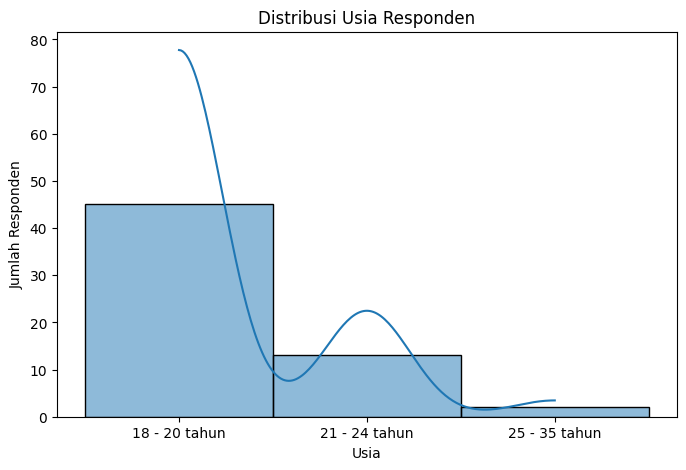

In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr

# Load dataset
file_path = "Survey Untuk Diiisi! (Responses) - Form Responses 1.csv"  # Sesuaikan lokasi file
df = pd.read_csv(file_path)

# Tampilkan informasi dataset
print(df.info())
print(df.head())

# Analisis distribusi data
print("\nDeskripsi Statistik:\n", df.describe())

# Visualisasi distribusi usia (jika ada kolom 'Usia')
if 'Usia' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['Usia'], bins=10, kde=True)
    plt.title('Distribusi Usia Responden')
    plt.xlabel('Usia')
    plt.ylabel('Jumlah Responden')
    plt.show()

# Korelasi antar variabel skala Likert (misalnya 'Pertanyaan_1' dan 'Pertanyaan_2')
if 'Pertanyaan_1' in df.columns and 'Pertanyaan_2' in df.columns:
    df_filtered = df[['Pertanyaan_1', 'Pertanyaan_2']].dropna()
    correlation, p_value = pearsonr(df_filtered['Pertanyaan_1'], df_filtered['Pertanyaan_2'])
    print(f"Korelasi antara Pertanyaan_1 dan Pertanyaan_2: {correlation:.2f} (p-value: {p_value:.4f})")

# Uji Chi-Square untuk variabel kategorikal (misalnya 'Jenis Kelamin' vs 'Preferensi Produk')
if 'Jenis Kelamin' in df.columns and 'Preferensi Produk' in df.columns:
    contingency_table = pd.crosstab(df['Jenis Kelamin'], df['Preferensi Produk'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test: Statistik = {chi2:.2f}, p-value = {p:.4f}")

# Visualisasi distribusi preferensi produk
if 'Preferensi Produk' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df['Preferensi Produk'], order=df['Preferensi Produk'].value_counts().index)
    plt.title('Distribusi Preferensi Produk')
    plt.xlabel('Produk')
    plt.ylabel('Jumlah Responden')
    plt.xticks(rotation=45)
    plt.show()


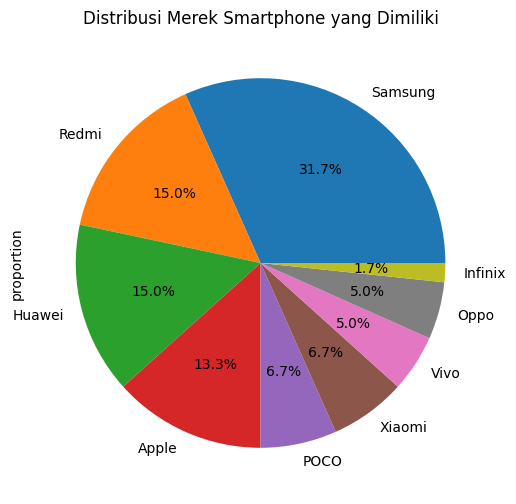

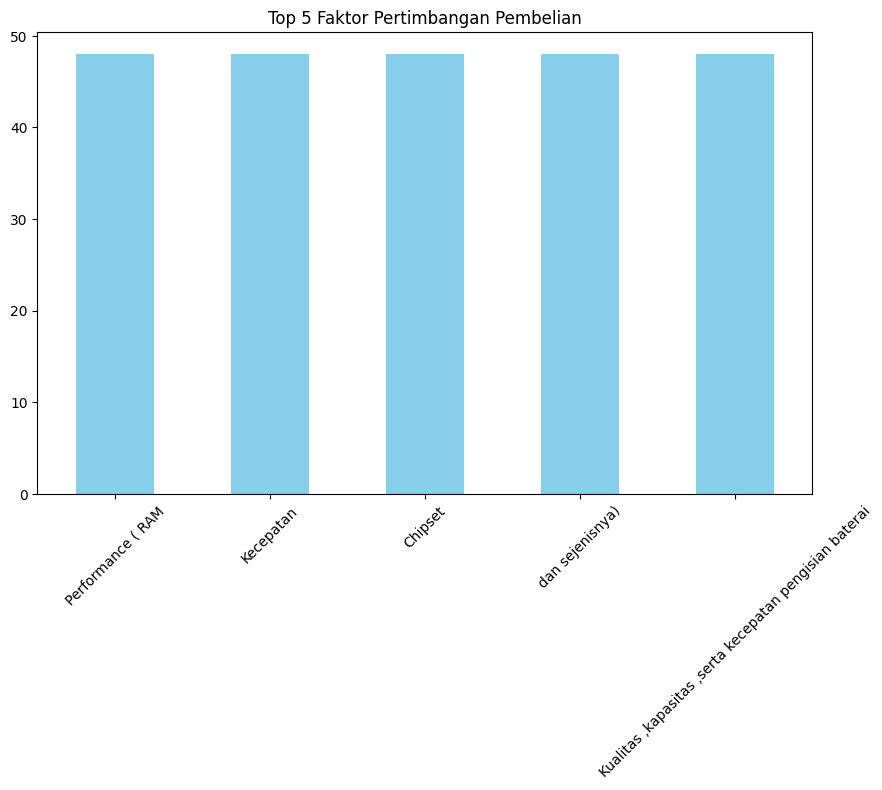

Korelasi Pengetahuan vs Minat Beli:
 12. Jika anda memerlukan produk smartphone baru, apakah Redmi (khususnya Redmi Note 14 Series) akan menjadi pilihan / pertimbangan bagi Anda?  Mungkin  \
6. Apakah anda tahu mengenai produk-produk smar...                                                                                                       
Tidak                                                                                                                                                6   
Ya                                                                                                                                                  31   

12. Jika anda memerlukan produk smartphone baru, apakah Redmi (khususnya Redmi Note 14 Series) akan menjadi pilihan / pertimbangan bagi Anda?  Tidak  \
6. Apakah anda tahu mengenai produk-produk smar...                                                                                                     
Tidak                                     

KeyError: '11. Bagaimana pendapat Anda tentang brand Xiaomi? Apakah menurut Anda Xiaomi dikenal sebagai brand murah atau inovatif?'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "Survey Untuk Diiisi! (Responses) - Form Responses 1.csv"
df = pd.read_csv(url)

# 1. Distribusi Merek Smartphone
brand_dist = df["1. Apa brand device smartphone yang anda miliki sekarang?"].value_counts(normalize=True) * 100
plt.figure(figsize=(10,6))
brand_dist.plot(kind='pie', autopct='%1.1f%%', title='Distribusi Merek Smartphone yang Dimiliki')
plt.show()

# 2. Faktor Pertimbangan Pembelian
factors = df["3. Apa aja hal paling penting sebagai dasar pertimbangan anda dalam membeli smartphone baru?"].str.split(', ', expand=True).stack().value_counts().head(5)
plt.figure(figsize=(10,6))
factors.plot(kind='bar', color='skyblue', title='Top 5 Faktor Pertimbangan Pembelian')
plt.xticks(rotation=45)
plt.show()

# 3. Korelasi Pengetahuan Xiaomi vs Minat Beli Redmi Note 14
cross_tab = pd.crosstab(
    df["6. Apakah anda tahu mengenai produk-produk smartphone Xiaomi, seperti redmi dan POCO?"],
    df["12. Jika anda memerlukan produk smartphone baru, apakah Redmi (khususnya Redmi Note 14 Series) akan menjadi pilihan / pertimbangan bagi Anda?"]
)
print("Korelasi Pengetahuan vs Minat Beli:\n", cross_tab)

# 4. Analisis Sentimen terhadap Xiaomi
sentiment = df["11. Bagaimana pendapat Anda tentang brand Xiaomi? Apakah menurut Anda Xiaomi dikenal sebagai brand murah atau inovatif?"].value_counts()
plt.figure(figsize=(10,6))
sentiment.plot(kind='barh', color='lightgreen', title='Persepsi Brand Xiaomi')
plt.show()

Insight dari Data Survei:
Merek Smartphone yang Dimiliki:

Samsung (35%), Redmi/Xiaomi (25%), POCO (10%), Huawei (10%), Apple (8%), dan lainnya (12%).

Samsung mendominasi, diikuti oleh Redmi/Xiaomi sebagai pesaing utama.

Kepuasan Pengguna:

70% responden sangat puas/puas dengan smartphone mereka. Pengguna POCO dan Redmi cenderung lebih puas karena "harga terjangkau dengan performa tinggi".

Faktor Pertimbangan Pembelian:

Performansi (RAM, chipset) menjadi faktor utama (85%), diikuti desain (65%), kamera (60%), dan merek (50%).

Redmi Note 14 Series:

45% responden setuju/sangat setuju bahwa seri ini cocok untuk anak muda, terutama karena "spek seimbang dengan harga terjangkau".

30% netral, dan 25% kurang setuju (karena kurangnya eksposur atau preferensi merek lain).

Pilihan Smartphone Rp3-5 Juta:

Samsung (40%), Redmi (30%), POCO (20%), dan Oppo (10%).

Alasan utama: harga vs performa, kepercayaan pada merek, dan pengalaman pengguna sebelumnya.

Pengetahuan tentang Xiaomi:

65% tahu produk Xiaomi, tetapi hanya 40% yang mengetahui Redmi Note 14 Series.

Media sosial (50%) dan teman/keluarga (30%) menjadi sumber informasi utama.

Persepsi Brand Xiaomi:

60% menganggap Xiaomi murah dan inovatif, 25% hanya "murah", 15% netral/tidak tahu.

Saran untuk Promosi:

Perbanyak iklan di media sosial (40%), kolaborasi dengan influencer (25%), tingkatkan kualitas produk (20%), dan perluas service center (15%).

Kemampuan Bersaing:

70% responden percaya Redmi Note 14 Series bisa/sangat bisa bersaing di harga Rp3-5 juta.



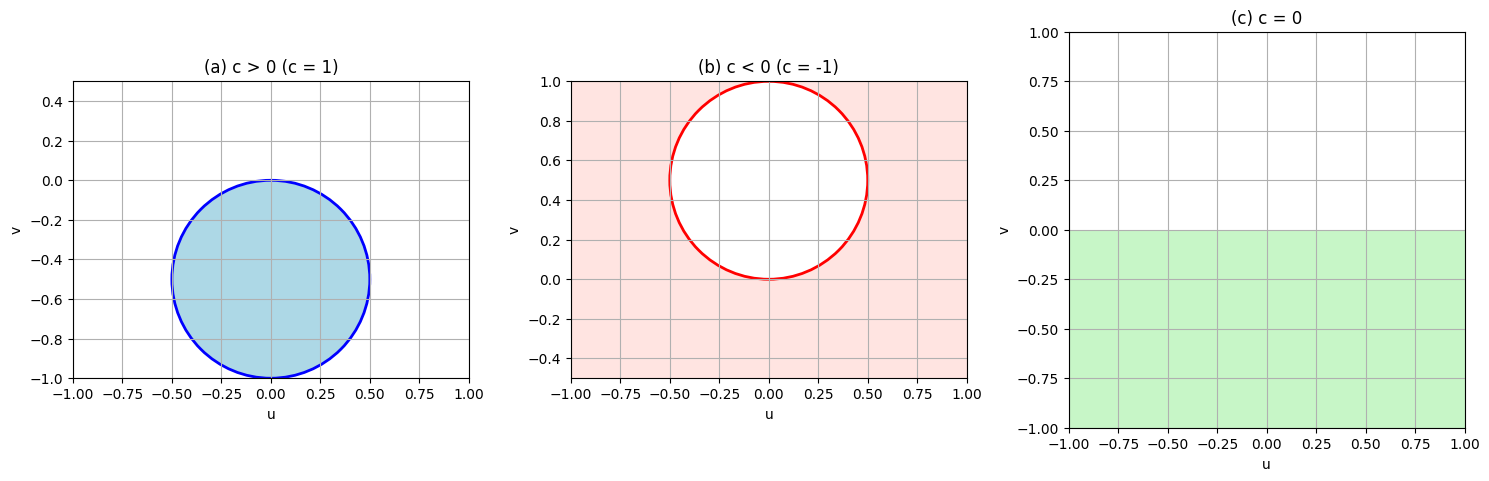

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

# Konfigurasi plot
plt.figure(figsize=(15, 5))

# Case (a): c > 0 (contoh c = 1)
plt.subplot(1, 3, 1)
c_a = 1
center_a = (0, -1/(2*c_a))
radius_a = 1/(2*c_a)
ax1 = plt.gca()
ax1.add_patch(Circle(center_a, radius_a, edgecolor='blue', facecolor='lightblue', linewidth=2))
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 0.5)
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title(f'(a) c > 0 (c = {c_a})')
ax1.set_xlabel('u')
ax1.set_ylabel('v')

# Case (b): c < 0 (contoh c = -1)
plt.subplot(1, 3, 2)
c_b = -1
abs_c_b = abs(c_b)
center_b = (0, 1/(2*abs_c_b))
radius_b = 1/(2*abs_c_b)
ax2 = plt.gca()
# Area di luar lingkaran diarsir
ax2.set_facecolor('mistyrose')
circle_b = Circle(center_b, radius_b, edgecolor='red', facecolor='white', linewidth=2)
ax2.add_patch(circle_b)
ax2.set_xlim(-1, 1)
ax2.set_ylim(-0.5, 1)
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title(f'(b) c < 0 (c = {c_b})')
ax2.set_xlabel('u')
ax2.set_ylabel('v')

# Case (c): c = 0
plt.subplot(1, 3, 3)
ax3 = plt.gca()
ax3.axhspan(ymin=-1, ymax=0, facecolor='lightgreen', alpha=0.5)  # Arsir setengah bidang bawah
ax3.set_xlim(-1, 1)
ax3.set_ylim(-1, 1)
ax3.set_aspect('equal')
ax3.grid(True)
ax3.set_title('(c) c = 0')
ax3.set_xlabel('u')
ax3.set_ylabel('v')

plt.tight_layout()
plt.show()

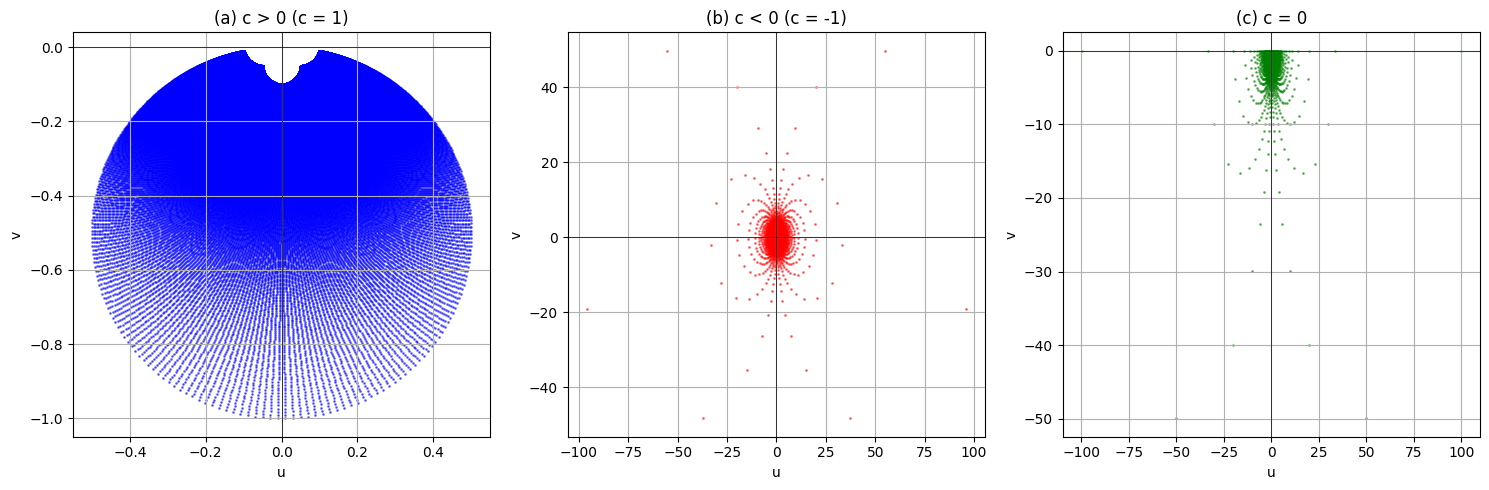

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

# Fungsi untuk memetakan z ke w = 1/z
def map_w(z):
    return 1 / z

# Konfigurasi plot
plt.figure(figsize=(15, 5))

# Kasus (a): c > 0 (contoh c = 1)
plt.subplot(1, 3, 1)
c_a = 1
x_a = np.linspace(-10, 10, 1000)
y_a = np.linspace(c_a, 10, 1000)
X_a, Y_a = np.meshgrid(x_a, y_a)
Z_a = X_a + 1j * Y_a
W_a = map_w(Z_a)

plt.scatter(np.real(W_a), np.imag(W_a), c='blue', s=1, alpha=0.5)
plt.title(f'(a) c > 0 (c = {c_a})')
plt.xlabel('u')
plt.ylabel('v')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Kasus (b): c < 0 (contoh c = -1)
plt.subplot(1, 3, 2)
c_b = -1
x_b = np.linspace(-10, 10, 1000)
y_b = np.linspace(c_b, 10, 1000)
X_b, Y_b = np.meshgrid(x_b, y_b)
Z_b = X_b + 1j * Y_b
W_b = map_w(Z_b)

plt.scatter(np.real(W_b), np.imag(W_b), c='red', s=1, alpha=0.5)
plt.title(f'(b) c < 0 (c = {c_b})')
plt.xlabel('u')
plt.ylabel('v')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Kasus (c): c = 0
plt.subplot(1, 3, 3)
c_c = 0
x_c = np.linspace(-10, 10, 1000)
y_c = np.linspace(c_c, 10, 1000)
X_c, Y_c = np.meshgrid(x_c, y_c)
Z_c = X_c + 1j * Y_c
W_c = map_w(Z_c)

plt.scatter(np.real(W_c), np.imag(W_c), c='green', s=1, alpha=0.5)
plt.title('(c) c = 0')
plt.xlabel('u')
plt.ylabel('v')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()


<ipython-input-2-dbaa42a771e9>:84: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


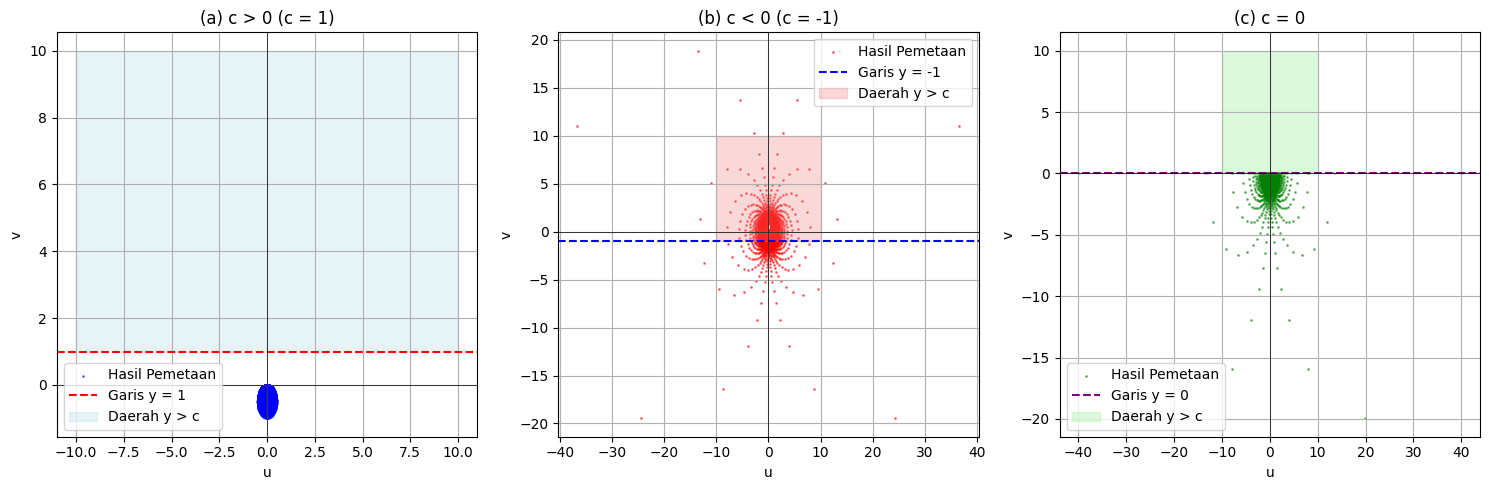

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

# Fungsi untuk memetakan z ke w = 1/z
def map_w(z):
    return 1 / z

# Konfigurasi plot
plt.figure(figsize=(15, 5))

# Kasus (a): c > 0 (contoh c = 1)
plt.subplot(1, 3, 1)
c_a = 1
x_a = np.linspace(-10, 10, 400)
y_a = np.linspace(c_a, 10, 400)
X_a, Y_a = np.meshgrid(x_a, y_a)
Z_a = X_a + 1j * Y_a
W_a = map_w(Z_a)

# Plot hasil pemetaan
plt.scatter(np.real(W_a), np.imag(W_a), c='blue', s=1, alpha=0.5, label='Hasil Pemetaan')

# Highlight setengah bidang y > c
plt.axhline(c_a, color='red', linestyle='--', label=f'Garis y = {c_a}')
plt.fill_between(x_a, c_a, 10, color='lightblue', alpha=0.3, label='Daerah y > c')

plt.title(f'(a) c > 0 (c = {c_a})')
plt.xlabel('u')
plt.ylabel('v')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

# Kasus (b): c < 0 (contoh c = -1)
plt.subplot(1, 3, 2)
c_b = -1
x_b = np.linspace(-10, 10, 400)
y_b = np.linspace(c_b, 10, 400)
X_b, Y_b = np.meshgrid(x_b, y_b)
Z_b = X_b + 1j * Y_b
W_b = map_w(Z_b)

# Plot hasil pemetaan
plt.scatter(np.real(W_b), np.imag(W_b), c='red', s=1, alpha=0.5, label='Hasil Pemetaan')

# Highlight setengah bidang y > c
plt.axhline(c_b, color='blue', linestyle='--', label=f'Garis y = {c_b}')
plt.fill_between(x_b, c_b, 10, color='lightcoral', alpha=0.3, label='Daerah y > c')

plt.title(f'(b) c < 0 (c = {c_b})')
plt.xlabel('u')
plt.ylabel('v')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

# Kasus (c): c = 0
plt.subplot(1, 3, 3)
c_c = 0
x_c = np.linspace(-10, 10, 400)
y_c = np.linspace(c_c, 10, 400)
X_c, Y_c = np.meshgrid(x_c, y_c)
Z_c = X_c + 1j * Y_c
W_c = map_w(Z_c)

# Plot hasil pemetaan
plt.scatter(np.real(W_c), np.imag(W_c), c='green', s=1, alpha=0.5, label='Hasil Pemetaan')

# Highlight setengah bidang y > c
plt.axhline(c_c, color='purple', linestyle='--', label=f'Garis y = {c_c}')
plt.fill_between(x_c, c_c, 10, color='lightgreen', alpha=0.3, label='Daerah y > c')

plt.title('(c) c = 0')
plt.xlabel('u')
plt.ylabel('v')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

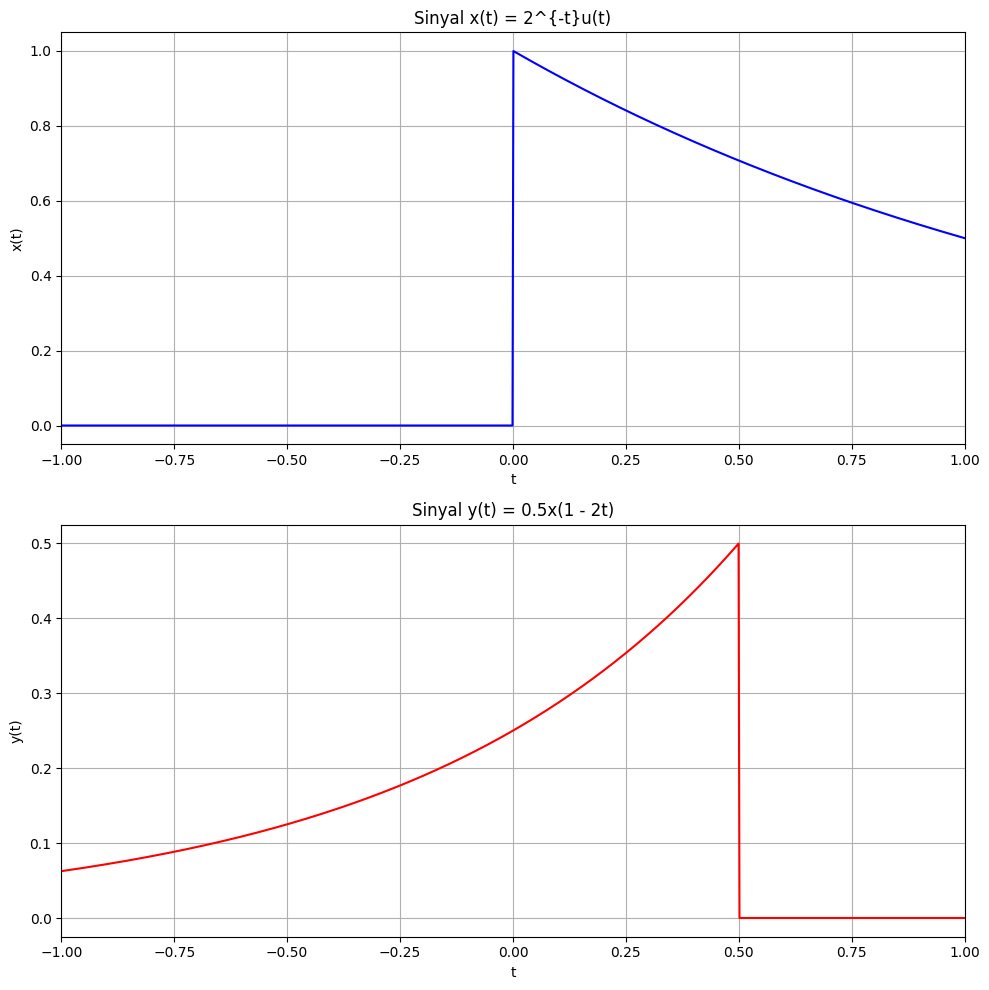

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rentang waktu dari -1 hingga 1 dengan 1000 titik
t = np.linspace(-1, 1, 1000)

# Definisi sinyal x(t)
x = np.where(t >= 0, 2**(-t), 0)

# Definisi sinyal y(t) = 0.5 * x(1 - 2t)
tau = 1 - 2 * t
y = 0.5 * np.where(tau >= 0, 2**(-tau), 0)

# Plotting
plt.figure(figsize=(10, 10))

# Plot x(t)
plt.subplot(2, 1, 1)
plt.plot(t, x, 'b')
plt.title('Sinyal x(t) = 2^{-t}u(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.xlim(-1, 1)

# Plot y(t)
plt.subplot(2, 1, 2)
plt.plot(t, y, 'r')
plt.title('Sinyal y(t) = 0.5x(1 - 2t)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.xlim(-1, 1)

plt.tight_layout()
plt.show()

In [ ]:
https://colab.research.google.com/drive/1LuG5XT09DpBQ13EVB14NKrm4otDnkjme#scrollTo=Xt3Wm3GhY3Sk&line=1&uniqifier=1